### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read dataset

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
data.shape

(333, 15)

### Feature selection

In [5]:
correlation_matrix = data.corr().round(2)

correlation_matrix['medv']

ID        -0.22
crim      -0.41
zn         0.34
indus     -0.47
chas       0.20
nox       -0.41
rm         0.69
age       -0.36
dis        0.25
rad       -0.35
tax       -0.45
ptratio   -0.48
black      0.34
lstat     -0.74
medv       1.00
Name: medv, dtype: float64

In [6]:
X = data[['rm', 'lstat']].values
y = data['medv'].values

### Data Visualization

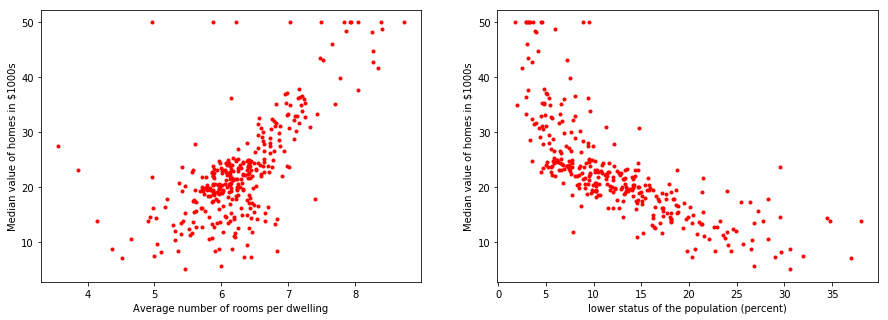

In [7]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(X[:, 0], y, 'r.')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of homes in $1000s')

plt.subplot(122)
plt.plot(X[:, 1], y, 'r.')
plt.xlabel('lower status of the population (percent)')
plt.ylabel('Median value of homes in $1000s')

plt.show()

<IPython.core.display.Javascript object>


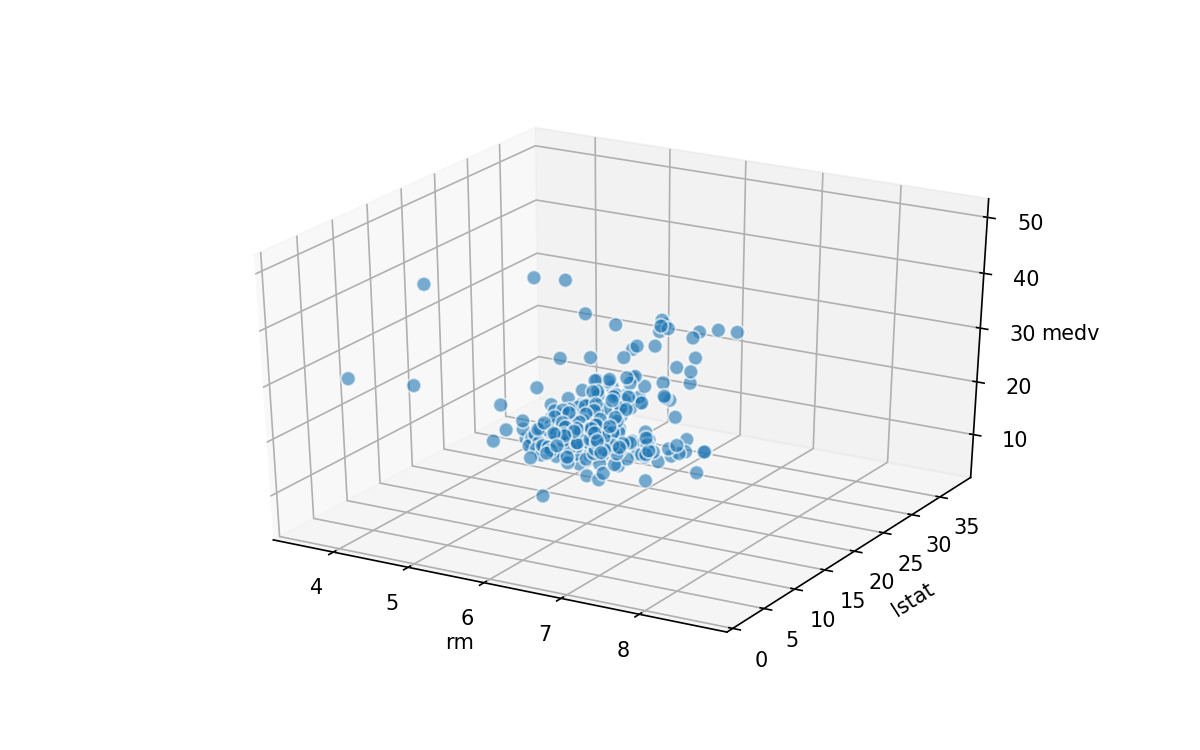

In [8]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = y
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('rm')
ax.set_ylabel('lstat')
ax.set_zlabel('medv')

plt.show()

### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Model Fitting

In [10]:
from sklearn import linear_model

model = linear_model.LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Model Evaluation

In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(y_test, y_pred)
print(error)

26.40894716967294


<IPython.core.display.Javascript object>


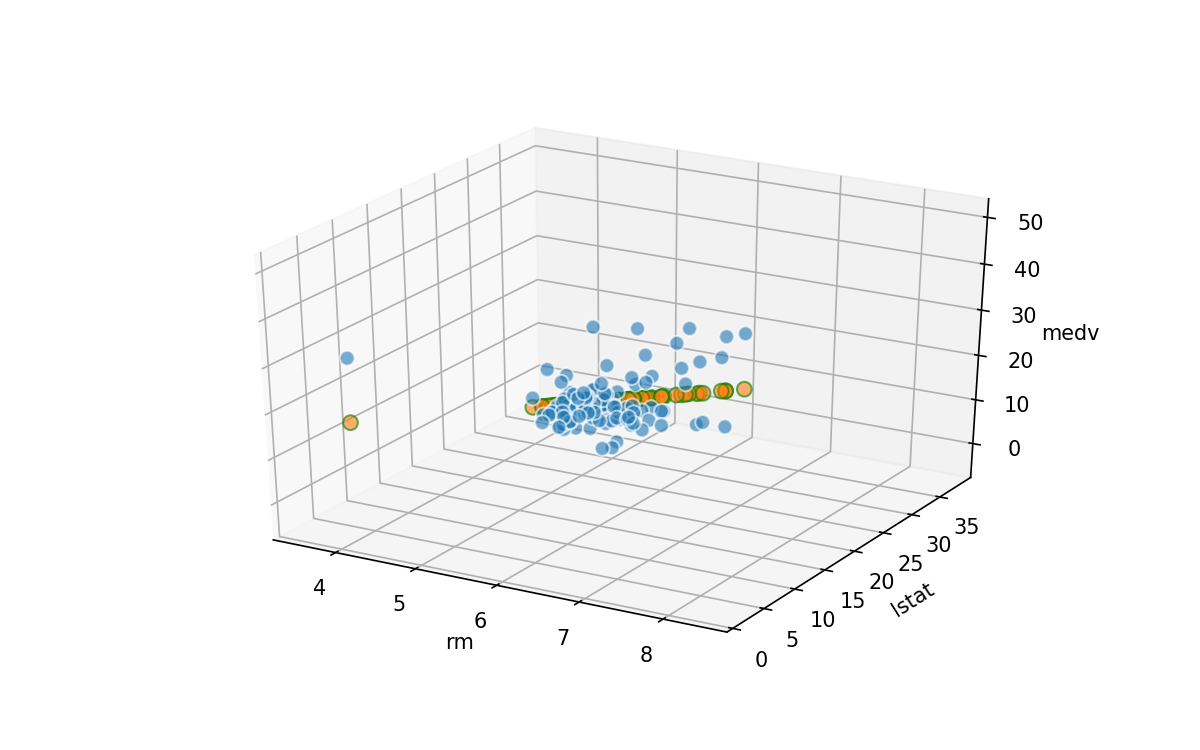

In [14]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

xs = X_test[:, 0]
ys = X_test[:, 1]
zs = y_test
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')
ax.scatter(xs, ys, y_pred, s=50, alpha=0.6, edgecolors='g')

ax.set_xlabel('rm')
ax.set_ylabel('lstat')
ax.set_zlabel('medv')

plt.show()